In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install plotly
# %pip install shapely

In [1]:
# Importing useful libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Reading the datasets
df_train = pd.read_csv("data/stores_train.csv")
df_test = pd.read_csv("data/stores_test.csv")
df_bus_stops = pd.read_csv("data/busstops_norway_fixed.csv")
df_grunnkrets_age_dist = pd.read_csv("data/grunnkrets_age_distribution.csv")
df_grunnkrets_house_pers = pd.read_csv("data/grunnkrets_households_num_persons.csv")
df_grunnkrets_income_house = pd.read_csv("data/grunnkrets_income_households.csv")
df_grunnkrets_stripped = pd.read_csv("data/grunnkrets_norway_stripped.csv")
df_plaace_hierarchy = pd.read_csv("data/plaace_hierarchy.csv")
df_extra = pd.read_csv("data/stores_extra.csv")
# df_sample_sub = pd.read_csv("data/sample_submission.csv")

In [3]:
# Only select 2016 year
df_grunnkrets_stripped = df_grunnkrets_stripped[df_grunnkrets_stripped.year == 2016]
df_grunnkrets_age_dist = df_grunnkrets_age_dist[df_grunnkrets_age_dist.year == 2016]
df_grunnkrets_house_pers = df_grunnkrets_house_pers[df_grunnkrets_house_pers.year == 2016]
df_grunnkrets_income_house = df_grunnkrets_income_house[df_grunnkrets_income_house.year == 2016]

# EDA

Merge the train/test in one df with a split feature.

In [4]:
df_all = pd.concat([df_train, df_test])
df_all['split'] = np.where(df_all['revenue'].isna(), 'Test', 'Train')
df_all.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,split
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Train
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Train
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Train
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Train
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Train


In [5]:
print(f"Number of Training Examples = {df_train.shape[0]}")
print(f"Number of Test Examples = {df_test.shape[0]}\n")
print(f"Training Shape = {df_train.shape}")
print(f"Test Shape = {df_test.shape}\n")
print('Train columns \n', list(df_train.columns))
print('Test columns \n', list(df_test.columns))

Number of Training Examples = 12859
Number of Test Examples = 8577

Training Shape = (12859, 12)
Test Shape = (8577, 11)

Train columns 
 ['store_id', 'year', 'store_name', 'plaace_hierarchy_id', 'sales_channel_name', 'grunnkrets_id', 'address', 'lat', 'lon', 'chain_name', 'mall_name', 'revenue']
Test columns 
 ['store_id', 'year', 'store_name', 'plaace_hierarchy_id', 'sales_channel_name', 'grunnkrets_id', 'address', 'lat', 'lon', 'chain_name', 'mall_name']


In [6]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12859 entries, 0 to 12858
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             12859 non-null  object 
 1   year                 12859 non-null  int64  
 2   store_name           12859 non-null  object 
 3   plaace_hierarchy_id  12859 non-null  object 
 4   sales_channel_name   12859 non-null  object 
 5   grunnkrets_id        12859 non-null  int64  
 6   address              11085 non-null  object 
 7   lat                  12859 non-null  float64
 8   lon                  12859 non-null  float64
 9   chain_name           3737 non-null   object 
 10  mall_name            2280 non-null   object 
 11  revenue              12859 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 11 columns):
 #   Column      

Text(0.5, 1.0, 'Fraction of rows with NaN values')

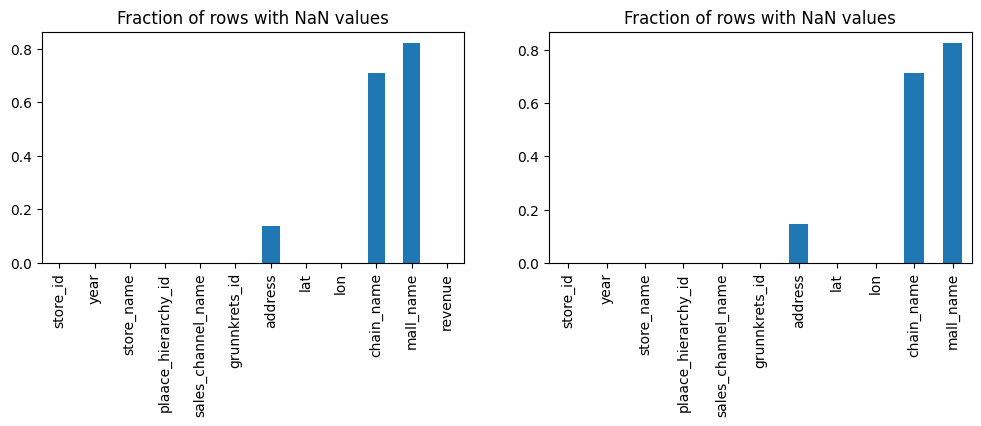

In [7]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
df_train.isna().mean().plot.bar(ax=ax1)
df_test.isna().mean().plot.bar(ax=ax2)
ax1.set_title('Fraction of rows with NaN values')
ax2.set_title('Fraction of rows with NaN values')

The adress feature as 1,774:train &  1237:test NaN rows.

The other NaN features are for the chain/mall name but it's normal. This one should be encoded in the future.

# Revenue

Minimal revenue is : 0.0
Maximal revenue is : 219.599
Average revenue is : 8.22


C:\Users\thepy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


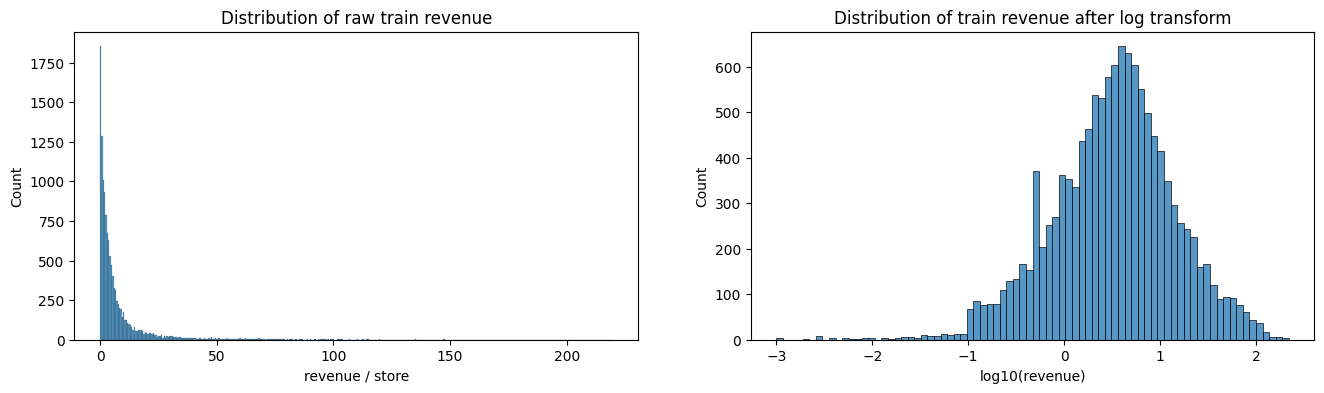

In [8]:
print(f"Minimal revenue is : {df_train['revenue'].min()}")
print(f"Maximal revenue is : {df_train['revenue'].max()}")
print(f"Average revenue is : {round(df_train['revenue'].mean(), 2)}")

fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2, dpi=100)
sns.histplot(df_train.revenue.rename('revenue / store'), ax=ax1)
ax1.set_title('Distribution of raw train revenue');
sns.histplot(np.log10(df_train.revenue).rename('log10(revenue)'), ax=ax2)
ax2.set_title('Distribution of train revenue after log transform');

In [14]:
print(f"Number of revenue 0 :{df_train[df_train.revenue == 0].revenue.count()}")
print(f"Number of revenue > 80 :{df_train[df_train.revenue >= 80].revenue.count()}")

Number of revenue 0 :217
Number of revenue > 80 :131


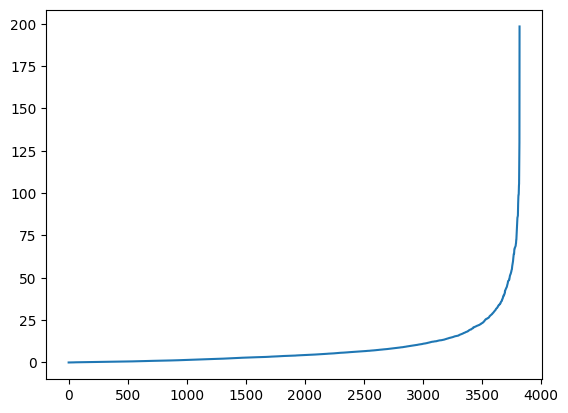

In [5]:
X = df_train[['grunnkrets_id', 'revenue']].groupby('grunnkrets_id').mean().sort_values('revenue')
plt.plot(range(X.shape[0]), np.asarray(X['revenue']))

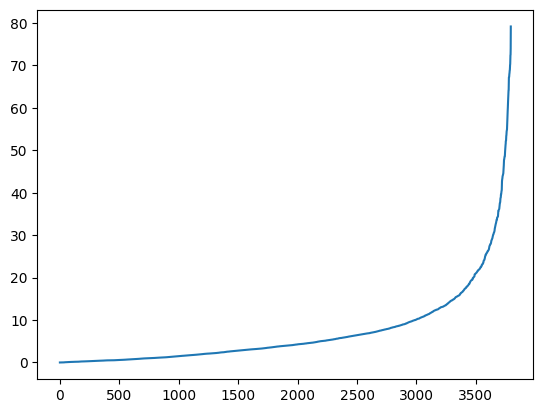

In [17]:
X = df_train[df_train.revenue < 80][['grunnkrets_id', 'revenue']].groupby('grunnkrets_id').mean().sort_values('revenue')
plt.plot(range(X.shape[0]), np.asarray(X['revenue']))

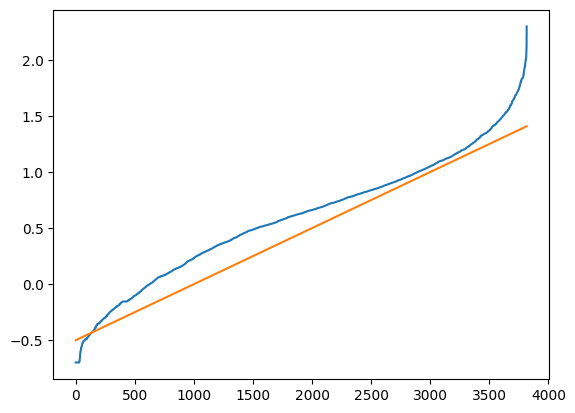

In [50]:
X = df_train[['grunnkrets_id', 'revenue']].groupby('grunnkrets_id').mean().sort_values('revenue')
plt.plot(range(X.shape[0]), np.log10(np.asarray(X['revenue']) + 0.2))
plt.plot(range(X.shape[0]), np.asarray(range(X.shape[0]))*0.0005 - 0.5)

In [98]:
print(f"Number of shop with a revenue above 100 : {len(X[X.revenue >= 100])}")

Number of shop with a revenue above 100 : 0


C:\Users\thepy\AppData\Local\Temp\ipykernel_16520\378609885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, ['revenue']] = np.where(X.revenue >= 100, X.revenue/10, X.revenue)


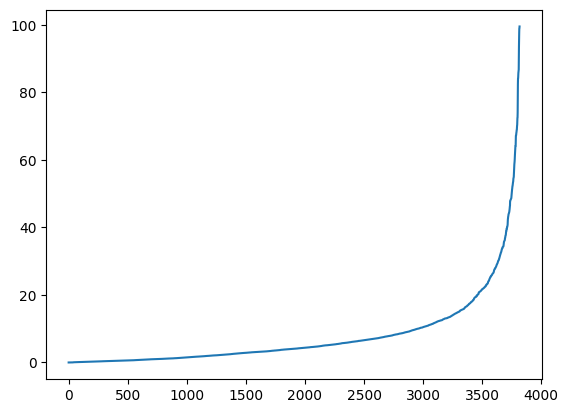

In [105]:
# revenue /10 where revenue >= 100
X = df_train[['grunnkrets_id', 'revenue']]
X.loc[:, ['revenue']] = np.where(X.revenue >= 100, X.revenue/10, X.revenue)
X = X.groupby('grunnkrets_id').mean().sort_values('revenue')
plt.plot(range(X.shape[0]), np.asarray(X['revenue']))

# Store ID

row with non digit id Empty DataFrame
Columns: [store_id, SI_p1, SI_p2, SI_p3]
Index: [] Empty DataFrame
Columns: [store_id, SI_p1, SI_p2, SI_p3]
Index: [] Empty DataFrame
Columns: [store_id, SI_p1, SI_p2, SI_p3]
Index: []
number of unique value per parts 12859 12859 12859
len of the part per part 9.0 8.930476708919823 5.481141612878139


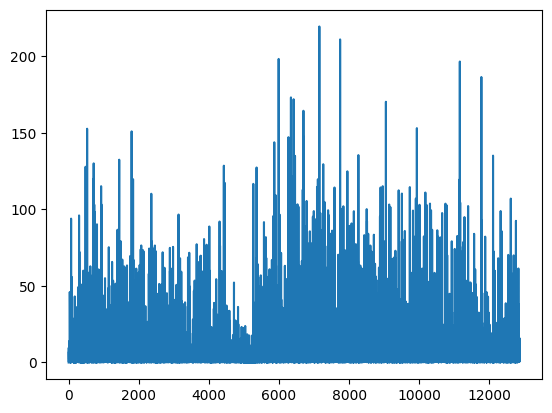

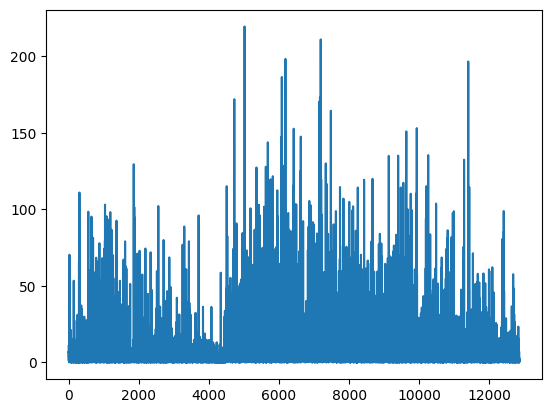

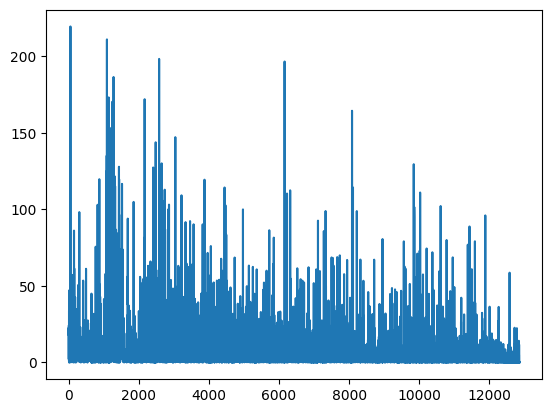

In [19]:
tmp_df = df_train.loc[:, ['store_id',]]
tmp_df[['SI_p1', 'SI_p2', 'SI_p3']] = df_train['store_id'].str.extract(r'(?P<p1>[0-9]+)-+(?P<p2>[0-9]+)-+(?P<p3>[0-9]+)',expand=True)
print('row with non digit id', tmp_df[~tmp_df.SI_p1.str.isdigit()], tmp_df[~tmp_df.SI_p2.str.isdigit()], tmp_df[~tmp_df.SI_p3.str.isdigit()])
tmp_df['len_p1'] = tmp_df['SI_p1'].str.len()
tmp_df['len_p2'] = tmp_df['SI_p2'].str.len()
tmp_df['len_p3'] = tmp_df['SI_p3'].str.len()
tmp_df[['SI_p1', 'SI_p2', 'SI_p3']] = tmp_df[['SI_p1', 'SI_p2', 'SI_p3']].apply(pd.to_numeric)
print('number of unique value per parts', len(tmp_df.SI_p1.unique()), len(tmp_df.SI_p1.unique()), len(tmp_df.SI_p1.unique()))
tmp_df = pd.merge(tmp_df, df_train[['revenue', 'store_id']], on='store_id', how='left')
print('len of the part per part', tmp_df['len_p1'].mean(), tmp_df['len_p2'].mean(), tmp_df['len_p3'].mean())
plt.plot(range(tmp_df.shape[0]), np.asarray(tmp_df.sort_values('SI_p1')['revenue']))
plt.show()
plt.plot(range(tmp_df.shape[0]), np.asarray(tmp_df.sort_values('SI_p2')['revenue']))
plt.show()
plt.plot(range(tmp_df.shape[0]), np.asarray(tmp_df.sort_values('SI_p3')['revenue']))
plt.show()

# Chain Name && Mall Name

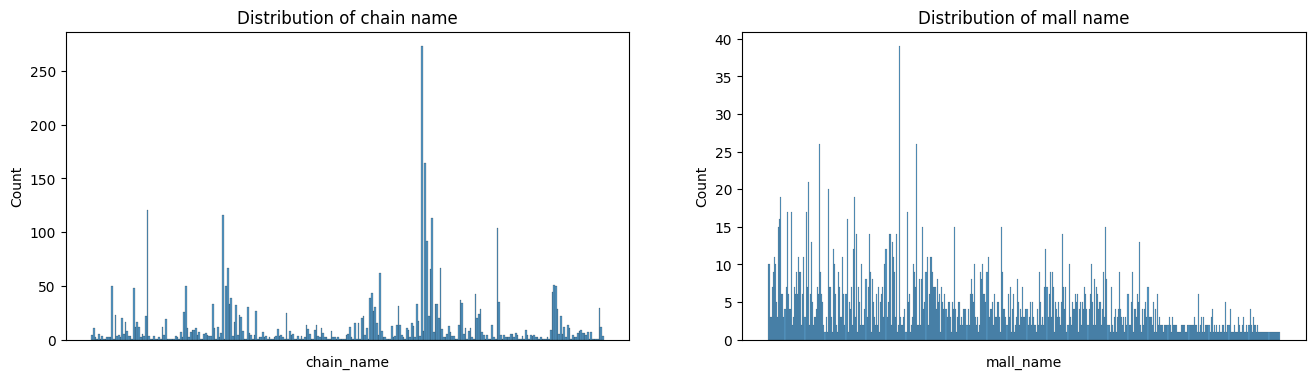

In [175]:
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2, dpi=100)
sns.histplot(df_train.chain_name, ax=ax1)
ax1.set_title('Distribution of chain name');
ax1.set(xticklabels=[]);
ax1.tick_params(bottom=False)

sns.histplot(df_train.mall_name, ax=ax2)
ax2.set_title('Distribution of mall name');
ax2.set(xticklabels=[]);
ax2.tick_params(bottom=False)

In [176]:
df_mall_chain = df_train
df_mall_chain['encoded_mall'] = np.where(df_train['mall_name'].isna(), 0, 1)
df_mall_chain['encoded_chain'] = np.where(df_train['chain_name'].isna(), 0, 1)
df_mall_chain.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,encoded_mall,encoded_chain
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,1,1
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,0,1
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,1,1
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,1,1
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,1,1


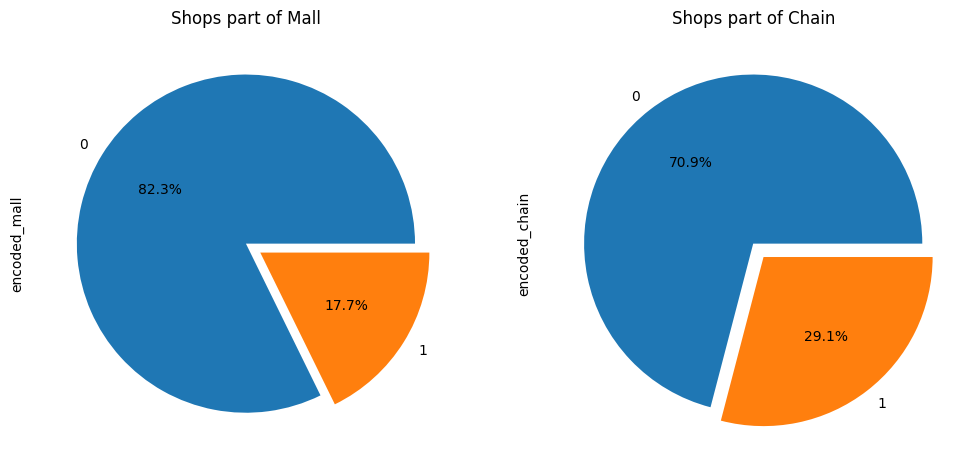

In [230]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
df_mall_chain['encoded_mall'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
df_mall_chain['encoded_chain'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=False)
ax[0].set_title('Shops part of Mall')
ax[1].set_title('Shops part of Chain')
plt.show()

In [47]:
df_train[df_train.chain_name.isna()]

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
7,913158733-913203305-675470,2016,GRENSEN BURGERBAR,1.1.1.0,Hamburger restaurants,1010301,OLAV VS GATE 1,59.119175,11.389572,NaN,NaN,3.640
10,911917696-911923149-620844,2016,DUDEBURGER.NO,1.1.1.0,Hamburger restaurants,5010512,GUDBRANDSDALSVEGEN 191,61.128926,10.452248,NaN,NaN,5.020
12,999257828-999539467-544070,2016,HEMSEDAL BURGER,1.1.1.0,Hamburger restaurants,6180101,NaN,60.862796,8.556376,NaN,NaN,3.445
16,915123171-984245270-62920,2016,EURO HAMBURGER,1.1.1.0,Hamburger restaurants,3012402,HERSLEBS GATE 7 A,59.918638,10.762711,NaN,NaN,2.128
21,913646797-913718712-696097,2016,MUNCHIES GRUNERLØKKAMUNCHISE,1.1.1.0,Hamburger restaurants,3012305,THORVALD MEYERS GATE 47 A,59.924155,10.758885,NaN,NaN,2.536
...,...,...,...,...,...,...,...,...,...,...,...,...
12852,916908814-916940491-828336,2016,ROMA BRUS OG ØLUTSALG SOFIEMYR AS,2.8.11.2,Beer and soda shop,2170301,SOFIEMYRVEIEN 6,59.794367,10.822117,NaN,NaN,1.067
12853,899151852-886007442-43426,2016,ALT TIL FEST AS,2.8.11.2,Beer and soda shop,2350207,GARDERMOVEGEN 11 A,60.143874,11.166341,NaN,NaN,2.857
12854,915789943-915806929-781991,2016,MEIERIGÅRDEN BRYGGERIUTSALG,2.8.11.2,Beer and soda shop,7010705,THUEGATA 2,59.416276,10.480970,NaN,NaN,0.088
12857,914337046-914343372-721294,2016,DET GODE BRYGG,2.8.11.2,Beer and soda shop,11020113,VÅGSGATA 16,58.850261,5.735674,NaN,Bystasjonen,3.642


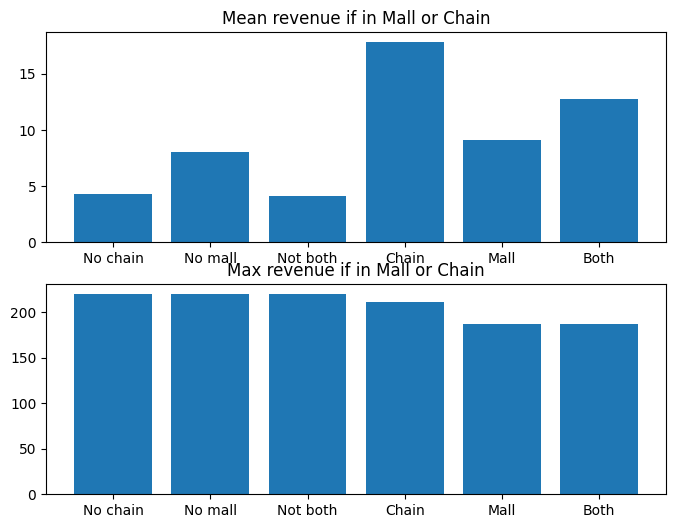

In [177]:
f,(ax1, ax2) = plt.subplots(2, figsize=(8,6))
x = [df_mall_chain[df_mall_chain.encoded_chain == 0].revenue.mean(),
     df_mall_chain[df_mall_chain.encoded_mall == 0].revenue.mean(),
     df_mall_chain[(df_mall_chain.encoded_mall == 0) & (df_mall_chain.encoded_chain == 0)].revenue.mean(),
     df_mall_chain[df_mall_chain.encoded_chain == 1].revenue.mean(),
     df_mall_chain[df_mall_chain.encoded_mall == 1].revenue.mean(),
     df_mall_chain[(df_mall_chain.encoded_mall == 1) & (df_mall_chain.encoded_chain == 1)].revenue.mean(),
    ]       
ax1.bar(np.arange(len(x)), height=x)
ax1.set_xticks(np.arange(len(x)), ['No chain', 'No mall', 'Not both', 'Chain', 'Mall', 'Both']);
ax1.set_title('Mean revenue if in Mall or Chain');

x = [df_mall_chain[df_mall_chain.encoded_chain == 0].revenue.max(),
     df_mall_chain[df_mall_chain.encoded_mall == 0].revenue.max(),
     df_mall_chain[(df_mall_chain.encoded_mall == 0) & (df_mall_chain.encoded_chain == 0)].revenue.max(),
     df_mall_chain[df_mall_chain.encoded_chain == 1].revenue.max(),
     df_mall_chain[df_mall_chain.encoded_mall == 1].revenue.max(),
     df_mall_chain[(df_mall_chain.encoded_mall == 1) & (df_mall_chain.encoded_chain == 1)].revenue.max(),
    ]       
ax2.bar(np.arange(len(x)), height=x)
ax2.set_xticks(np.arange(len(x)), ['No chain', 'No mall', 'Not both', 'Chain', 'Mall', 'Both']);
ax2.set_title('Max revenue if in Mall or Chain');


# Localisation

In [178]:
print(f"Minimal lat/lon is : {df_all['lat'].min()} | {df_all['lon'].min()}")
print(f"Maximal lat/lon is : {df_all['lat'].max()} | {df_all['lon'].max()}")
print(f"Average lat/lon is : {round(df_all['lat'].mean(), 2)} | {round(df_all['lon'].mean(), 2)}")

Minimal lat/lon is : 57.99418282682979 | 4.62588949001731
Maximal lat/lon is : 71.1099216326422 | 31.11893463
Average lat/lon is : 61.23 | 10.01


C:\Users\thepy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


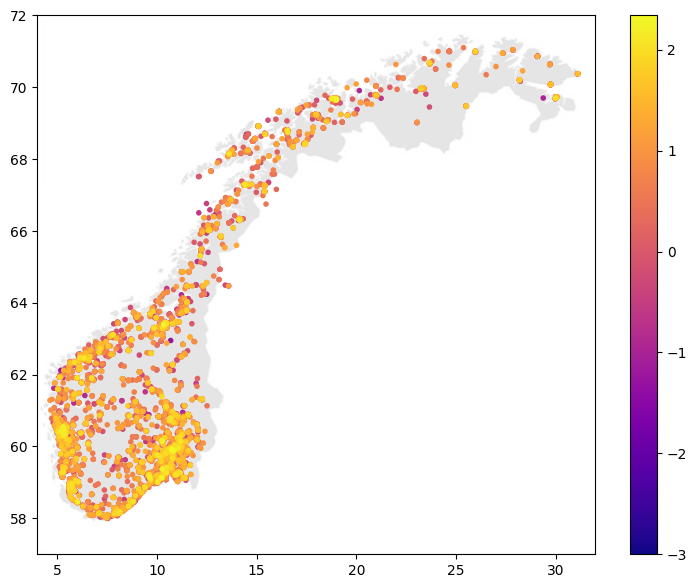

In [179]:
df_map = df_train.sort_values(by='revenue', ascending=True)
backdrop = plt.imread('ressources/map.jpg')
plt.figure(figsize=(9, 7), dpi=100)
ax = plt.gca()
ax.imshow(backdrop, 
          extent=[4,32, 57, 72], 
          aspect='auto', 
          alpha=0.2,
          )
cmap = np.log10(df_map.revenue)
heatmap = ax.scatter(x=df_map['lon'], 
                     y=df_map['lat'], 
                     c=cmap,
                     cmap='plasma',
                     marker=".",
                     )
ax.set_xlim(4, 32)    # min/max longitude of image 
ax.set_ylim(57, 72)  # min/max latitude of image
cbar = plt.colorbar(heatmap)

C:\Users\thepy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


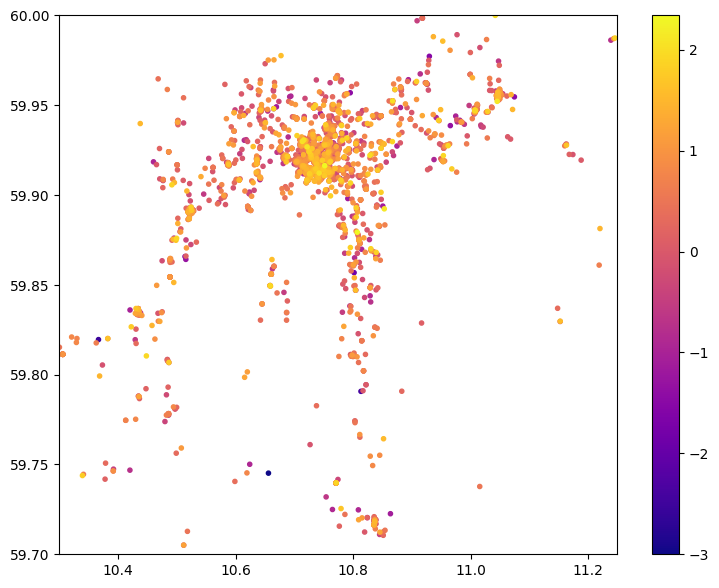

In [11]:
def plot_restricted_area(min_lon, max_lon, min_lat, max_lat):
    area = df_train[(df_train.lon>min_lon) & (df_train.lon<max_lon) & (df_train.lat>min_lat) & (df_train.lat<max_lat)]
    area = area.sort_values(by='revenue', ascending=True)
    backdrop = plt.imread('ressources/map.jpg')
    plt.figure(figsize=(9, 7), dpi=100)
    ax = plt.gca()
    heatmap = ax.scatter(x=area['lon'], 
               y=area['lat'], 
               c=np.log10(area.revenue),
               cmap='plasma',
               marker=".",
               )
    ax.set_xlim(min_lon, max_lon)    # min/max longitude of image 
    ax.set_ylim(min_lat, max_lat)  # min/max latitude of image
    
    cbar = plt.colorbar(heatmap)

# Olso
plot_restricted_area(10.3, 11.25, 59.7, 60)
# North random campaign
# plot_restricted_area(29, 32, 69, 71)

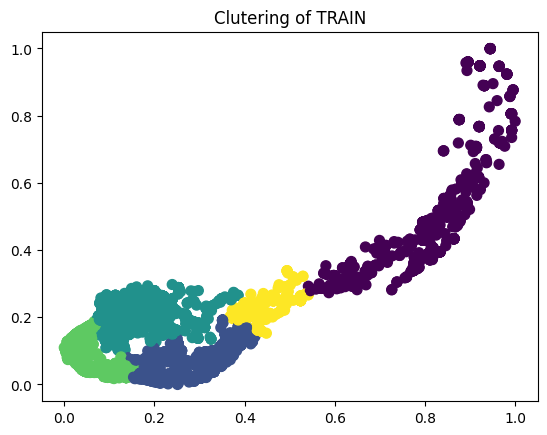

In [119]:
X = df_train.loc[:, ['lat', 'lon']]
X['lat'] = X.lat * 11.112
X['lon'] = X.lon * 6.4757
scaler = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scaler.fit_transform(X)
agglo = AgglomerativeClustering(n_clusters=5)
plt.scatter(X['lat'], X['lon'], c=agglo.fit_predict(X), s=50, cmap='viridis')
plt.title('Clutering of TRAIN')
plt.show()

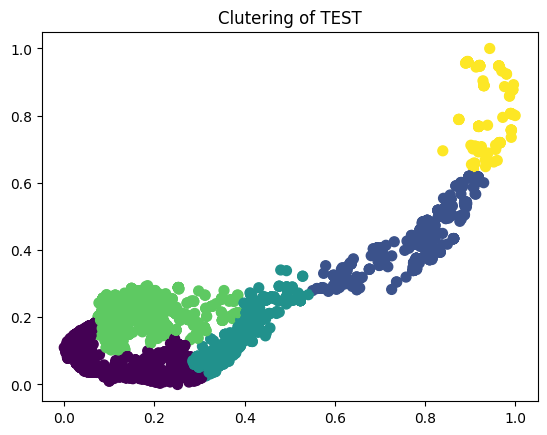

In [120]:
X = df_test.loc[:, ['lat', 'lon']]
X['lat'] = X.lat * 11.112
X['lon'] = X.lon * 6.4757
scaler = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scaler.fit_transform(X)
agglo = AgglomerativeClustering(n_clusters=5)
plt.scatter(X['lat'], X['lon'], c=agglo.fit_predict(X), s=50, cmap='viridis')
plt.title('Clutering of TEST')
plt.show()

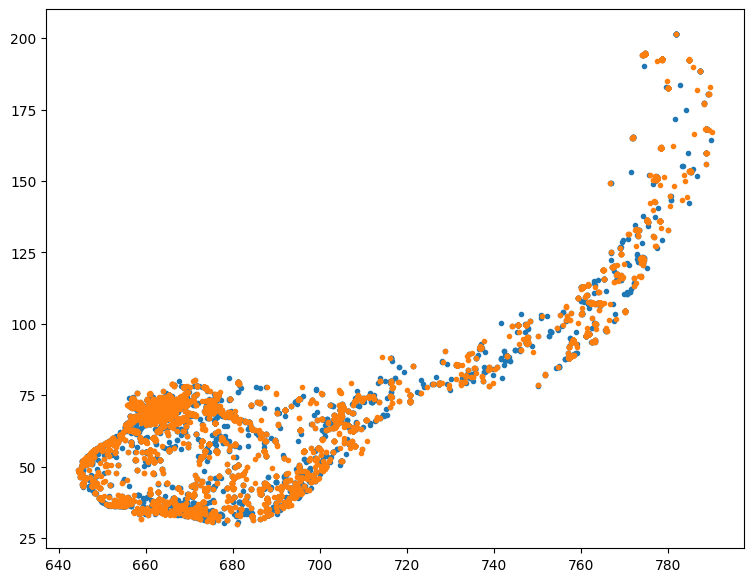

In [124]:
df_map_train = df_train.loc[:, ['lat', 'lon']]
df_map_train['lat'] = df_map_train.lat * 11.112
df_map_train['lon'] = df_map_train.lon * 6.4757
df_map_train = df_map_train.sort_values(by=['lat', 'lon'], ascending=True)


df_map_test = df_test.loc[:, ['lat', 'lon']]
df_map_test['lat'] = df_map_test.lat * 11.112
df_map_test['lon'] = df_map_test.lon * 6.4757
df_map_test = df_map_test.sort_values(by=['lat', 'lon'], ascending=True)

plt.figure(figsize=(9, 7), dpi=100)
plt.scatter(df_map_train['lat'], df_map_train['lon'], marker=".",)
plt.scatter(df_map_test['lat'], df_map_test['lon'], marker=".",)

## Generation of the data

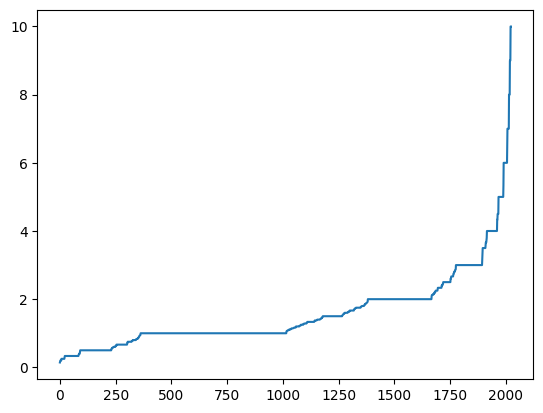

In [162]:
X = pd.DataFrame(df_train[['grunnkrets_id']].value_counts(), columns=['count'])
Y = pd.DataFrame(df_test[['grunnkrets_id']].value_counts(), columns=['count'])
total = pd.merge(X, Y, how="left", on="grunnkrets_id").fillna(0)
total['%'] = total.count_x / total.count_y
total = total.sort_values('%')
plt.plot(range(total.shape[0]), total['%'])


In [136]:
print(len(df_train['grunnkrets_id'].unique()), len(df_test['grunnkrets_id'].unique()))

3817 3161


# External Data

## Bus Stop

In [26]:
df_bus_stops.head()

,busstop_id,stopplace_type,importance_level,side_placement,geometry,grunnkrets_id
0,853cb081-cc32-4880-aa3e-26e96870d874,Plattform og lomme,Mangler viktighetsnivå,LEFT_AND_RIGHT,POINT(6.54064723379766 61.0618887850553),14170108
1,156b052b-2771-497a-b4f4-97fed59e1aca,"Lomme og skilt, ikke plattform",Mangler viktighetsnivå,LEFT_AND_RIGHT,POINT(5.89980086113255 60.1421872817075),0
2,7312a280-e14f-4b09-a421-02e8fe1bc63e,NaN,Mangler viktighetsnivå,MIDDLE_LEFT,POINT(10.7781327278563 59.9299988828761),3012106
3,d9cda2c7-355a-49c1-b56c-a33180d2a82e,NaN,Mangler viktighetsnivå,MIDDLE_LEFT,POINT(10.7781496457324 59.9301044643692),3012106
4,f803bcd3-182d-450b-bbb4-113c6ca885c2,NaN,Mangler viktighetsnivå,MIDDLE_RIGHT,POINT(10.7781676444854 59.9302099995898),3012106


In [224]:
geometries = np.asarray(df_grunnkrets_stripped.geometry)
print("Different kind of shapes from the grunnkrets are :", set([geometry[:geometry.find('(')] for geometry in geometries]))

Different kind of shapes from the grunnkrets are : {'MULTIPOLYGON', 'POLYGON'}


Parsing the bus stops to a number per grunnkret

In [12]:
print("Number of unique importance level :", len(df_bus_stops.importance_level.unique()))
print(df_bus_stops.importance_level.unique())

# {'Mangler viktighetsnivå': 0, 'Standard holdeplass': 1, 'Lokalt knutepunkt': 2, 'Regionalt knutepunkt': 3, 'Nasjonalt knutepunkt': 4, 'Annen viktig holdeplass': 5}
# ['Missing importance level', 'Default stop', 'Local hub', 'Regional hub', 'National hub', 'Other important stop']

Number of unique importance level : 6
['Mangler viktighetsnivå' 'Standard holdeplass' 'Lokalt knutepunkt'
 'Nasjonalt knutepunkt' 'Regionalt knutepunkt' 'Annen viktig holdeplass']


### Amount of bus stop by grunnkrets
Creating the dataframe with grunnkret_id and the amount of bus station in it

In [79]:
df_grunnkrets_bus_count = df_grunnkrets_stripped.loc[:, ['grunnkrets_id',]]
df_grunnkrets_bus_count = df_bus_stops.groupby(['grunnkrets_id', 'importance_level']).size().unstack(fill_value=0).replace(np.nan, 0)
df_grunnkrets_bus_count = df_grunnkrets_bus_count.drop(0)
df_grunnkrets_bus_count = df_grunnkrets_bus_count.rename(columns={'Mangler viktighetsnivå': 'missing_impt',
                                                                  'Standard holdeplass': 'strandard_bus',
                                                                  'Lokalt knutepunkt': 'local_bus',
                                                                  'Regionalt knutepunkt': 'regional_bus',
                                                                  'Nasjonalt knutepunkt': 'national_bus',
                                                                  'Annen viktig holdeplass': 'other_impt'})

# amount_bus_stop = df_grunnkrets_bus_count['grunnkrets_id'].map(df_bus_stop_count)
# df_grunnkrets_bus_count['amount_bus_stop'] = amount_bus_stop
# df_grunnkrets_bus_count['amount_bus_stop'] = df_grunnkrets_bus_count['amount_bus_stop'].replace(np.nan, 0)
df_grunnkrets_bus_count

importance_level,other_impt,local_bus,missing_impt,national_bus,regional_bus,strandard_bus
grunnkrets_id,,,,,,
1010102,0,0,2,0,0,0
1010103,0,0,13,0,0,0
1010104,0,1,9,0,0,0
1010105,0,1,12,0,1,0
1010107,0,2,4,0,0,1
...,...,...,...,...,...,...
20300306,0,0,3,0,0,0
20300310,0,0,3,0,0,1
20300311,0,0,3,0,0,0


Add a new feature with the number of bus stops in relation with the area of the grunnkret

In [78]:
# print(f"Minimal bus stops is : {df_grunnkrets_bus_count['amount_bus_stop'].min()}")
# print(f"Maximal bus stops is : {df_grunnkrets_bus_count['amount_bus_stop'].max()}")
# print(f"Average bus stops is : {round(df_grunnkrets_bus_count['amount_bus_stop'].mean(), 2)}")
X = df_train[['grunnkrets_id', 'revenue']].groupby('grunnkrets_id').mean().sort_values('revenue')
X = pd.merge(X, df_grunnkrets_bus_count, on="grunnkrets_id", how="left").fillna(0)
for column in [
    'revenue',
    'other_impt',
    'local_bus',
    'missing_impt',
    'national_bus',
    'regional_bus',
    'strandard_bus'
]:
    plt.plot(range(X.shape[0]), np.asarray(X[column]))

plt.plot(range(X.shape[0]), np.asarray(X['revenue']))
plt.plot(range(X.shape[0]), np.asarray(X[['other_impt', 'local_bus', 'national_bus', 'regional_bus', 'strandard_bus']].sum(axis=1)))

# fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2, dpi=100)
# sns.histplot(df_grunnkrets_bus_count.amount_bus_stop.rename(' amount grunnkret / amount_bus_stop '), ax=ax1)
# ax1.set_title('Distribution of bus stops in grunnkrets');
# sns.histplot(df_train.groupby('grunnkrets_id')['revenue'].agg([np.min, np.max, np.mean])['mean'].rename('revenue / grunnkret'), ax=ax2)
# ax2.set_title('Distribution of revenue in grunnkret');

NameError: name 'df_grunnkrets_bus_count' is not defined

## Grunnkrets

Drawing the grunnkrets map

0.0 %
1.8842327404280976 %
3.7684654808561953 %
5.652698221284293 %
7.5369309617123905 %
9.421163702140488 %
11.305396442568586 %
13.189629182996685 %
15.073861923424781 %
16.95809466385288 %
18.842327404280976 %
20.726560144709076 %
22.610792885137172 %
24.49502562556527 %
26.37925836599337 %
28.263491106421466 %
30.147723846849562 %
32.03195658727766 %
33.91618932770576 %
35.800422068133855 %
37.68465480856195 %
39.56888754899005 %
41.45312028941815 %
43.33735302984625 %
45.221585770274345 %
47.10581851070244 %
48.99005125113054 %
50.874283991558634 %
52.75851673198674 %
54.642749472414835 %
56.52698221284293 %
58.41121495327103 %
60.295447693699124 %
62.17968043412722 %
64.06391317455532 %
65.94814591498341 %
67.83237865541152 %
69.71661139583962 %
71.60084413626771 %
73.48507687669581 %
75.3693096171239 %
77.253542357552 %
79.1377750979801 %
81.0220078384082 %
82.9062405788363 %
84.7904733192644 %
86.6747060596925 %
88.55893880012059 %
90.44317154054869 %
92.32740428097678 %
94.211

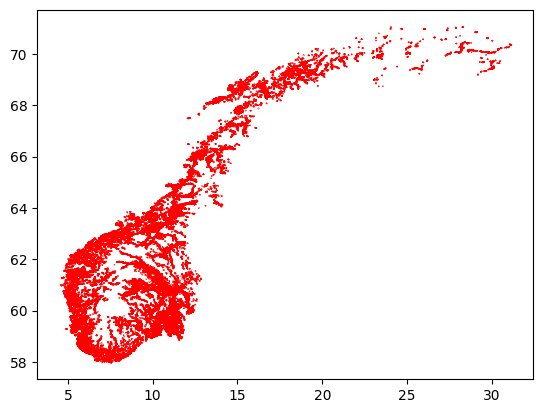

In [41]:
from shapely.wkt import loads
from shapely.geometry import Polygon, MultiPolygon

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection


def plot_polygon(ax, poly, **kwargs):
    path = Path.make_compound_path(
        Path(np.asarray(poly.exterior.coords)[:, :2]),
        *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])

    patch = PathPatch(path, **kwargs)
    collection = PatchCollection([patch], **kwargs)
    
    ax.add_collection(collection, autolim=True)
    ax.autoscale_view()
    return collection

geometries = [loads(geometry) for geometry in np.asarray(df_grunnkrets_stripped['geometry'])]

fig, ax = plt.subplots()
for idx, geometry in enumerate(geometries):
    if type(geometry) is MultiPolygon:
        for element in geometry.geoms:
            plot_polygon(ax, element, edgecolor='red')
    else:
        plot_polygon(ax, geometry, edgecolor='red')
    if idx % 500 == 0:
        print(idx*100/len(geometries), "%")
plt.show()

## Age distribution

In [23]:
df_grunnkrets_age_dist.head()

,grunnkrets_id,year,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,...,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_89,age_90
0,16013117,2015,14,14,14,14,13,13,12,11,...,0,0,0,0,0,0,0,0,0,0
1,16013117,2016,10,10,10,10,10,10,9,9,...,0,0,0,0,0,0,0,0,0,0
2,11030206,2015,5,5,5,5,5,4,4,3,...,0,0,0,0,0,0,0,0,0,0
3,16011203,2016,2,2,2,2,2,3,3,3,...,1,1,1,1,1,1,1,0,0,0
4,3011601,2016,7,7,7,7,6,6,5,4,...,1,1,0,0,0,0,0,0,0,0


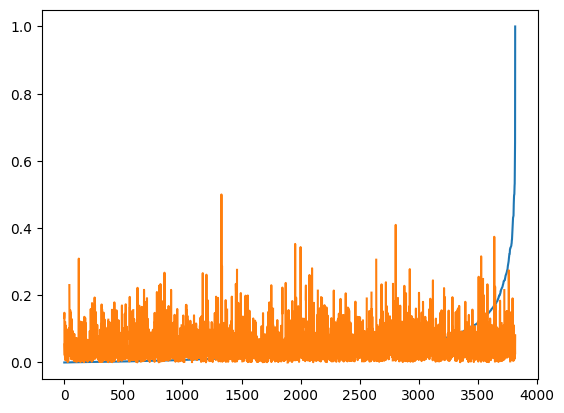

In [69]:
population_grunnnkrets = df_grunnkrets_age_dist.loc[:, ['grunnkrets_id']]
population_grunnnkrets['population'] = df_grunnkrets_age_dist.iloc[:,2:92].sum(axis=1)
X = df_train[['grunnkrets_id', 'revenue']]
X = df_train[['grunnkrets_id', 'revenue']].groupby('grunnkrets_id').mean().sort_values('revenue')
X = pd.merge(X, population_grunnnkrets, on="grunnkrets_id", how="left")

scaler = MinMaxScaler(feature_range = (0, 1))
X[X.columns] = scaler.fit_transform(X)
plt.plot(range(X.shape[0]), np.asarray(X['revenue']))
plt.plot(range(X.shape[0]), np.asarray(X['population'])/2)

In [13]:
df_grunnkrets_age_dist['sum'] = df_grunnkrets_age_dist.iloc[:,2:92].sum(axis=1)

In [24]:
df_grunnkrets_house_pers.head()

,grunnkrets_id,year,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles
0,12010509,2015,0,0,4,0,0,0,0,4
1,14390206,2015,0,7,0,0,0,0,0,3
2,18040514,2015,10,0,0,0,0,0,0,7
3,18040804,2015,0,0,0,0,0,0,0,0
4,18200101,2015,0,6,0,0,0,0,0,4


## Income

In [25]:
df_grunnkrets_income_house.head()

,grunnkrets_id,year,all_households,singles,couple_without_children,couple_with_children,other_households,single_parent_with_children
0,14200105,2016,551700,270300,0,0,0,0
1,2311202,2015,577700,311800,0,682300,0,0
2,2310501,2015,668800,292500,0,842000,0,0
3,14200401,2016,507000,250700,0,0,0,0
4,14200105,2015,539900,275800,0,710300,0,0


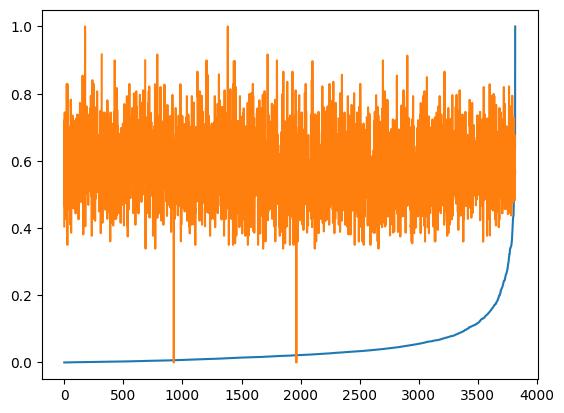

In [70]:
income_grunnnkrets = df_grunnkrets_income_house.loc[:, ['grunnkrets_id', 'all_households']]
X = df_train[['grunnkrets_id', 'revenue']]
X = df_train[['grunnkrets_id', 'revenue']].groupby('grunnkrets_id').mean().sort_values('revenue')
X = pd.merge(X, income_grunnnkrets, on="grunnkrets_id", how="left")
scaler = MinMaxScaler(feature_range = (0, 1))
X[X.columns] = scaler.fit_transform(X)
plt.plot(range(X.shape[0]), np.asarray(X['revenue']))
plt.plot(range(X.shape[0]), np.asarray(X['all_households']))

## Grunnkret Stripped

In [7]:
df_grunnkrets_stripped.head()

,grunnkrets_id,year,grunnkrets_name,district_name,municipality_name,geometry,area_km2
260,10010507,2016,Fidjane-Vestheiene,Hellemyr-Fjellro,Kristiansand,MULTIPOLYGON(((7.93581993399791 58.14261844480...,0.158484
261,10011105,2016,Gimlekollen vest,Kongsgård øvre-Gimlekollen,Kristiansand,MULTIPOLYGON(((8.02862690742917 58.17389896051...,0.474242
262,10011604,2016,Ryen,Tveit,Kristiansand,"POLYGON((8.10303607445248 58.2119345268037, 8....",1.464307
263,10011703,2016,Hånes vest,Hånes-Timenes,Kristiansand,"POLYGON((8.08896547903471 58.1756869597767, 8....",0.484497
264,10011707,2016,Hånes Nord-Bjørndalen,Hånes-Timenes,Kristiansand,"POLYGON((8.09775611761549 58.1741474661755, 8....",0.388282


In [9]:
print("Number of unique district name :", len(df_grunnkrets_stripped.district_name.unique()))
print("Number of unique district name :", len(df_grunnkrets_stripped.municipality_name.unique()))

Number of unique district name : 1483
Number of unique district name : 422


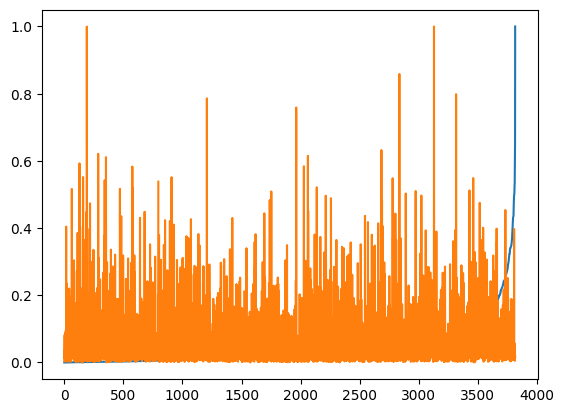

In [71]:
income_grunnnkrets = df_grunnkrets_stripped.loc[:, ['grunnkrets_id', 'area_km2']]
X = df_train[['grunnkrets_id', 'revenue']]
X = df_train[['grunnkrets_id', 'revenue']].groupby('grunnkrets_id').mean().sort_values('revenue')
X = pd.merge(X, income_grunnnkrets, on="grunnkrets_id", how="left")
scaler = MinMaxScaler(feature_range = (0, 1))
X[X.columns] = scaler.fit_transform(X)
plt.plot(range(X.shape[0]), np.asarray(X['revenue']))
plt.plot(range(X.shape[0]), np.asarray(X['area_km2']))

##  Hierarchy

In [27]:
df_plaace_hierarchy.head()

,plaace_hierarchy_id,sales_channel_name,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc
0,1.1.1.0,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
1,1.1.2.0,Sushi and wok restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.2,Sushi and wok restaurants,1.1.2.0,Sushi and wok restaurants
2,1.1.3.0,Thai restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.3,Thai restaurants,1.1.3.0,Thai restaurants
3,1.1.4.0,Chinese restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.4,Chinese restaurants,1.1.4.0,Chinese restaurants
4,1.1.5.0,Pizza restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.5,Pizza restaurants,1.1.5.0,Pizza restaurants


In [28]:
df_extra.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name
0,911669196-973140302-27020,2016,BURGER KING STRANDGATEN,1.1.1.0,Hamburger restaurants,12010115,STRANDGATEN 5,60.393979,5.323851,BURGER KING,NaN
1,913155726-992998792-5832,2016,BURGER KING JESSHEIM STORSENTER,1.1.1.0,Hamburger restaurants,2350205,STORGATA 6,60.142760,11.171834,BURGER KING,Jessheim Storsenter
2,988252905-981108604-47887,2016,BURGER KING LANGNES,1.1.1.0,Hamburger restaurants,19020419,HULDERVEGEN 6,69.671483,18.920483,BURGER KING,NaN
3,995194546-891354622-45262,2016,BURGER KING MAGNETEN LEVANGER,1.1.1.0,Hamburger restaurants,17190701,NaN,63.732791,11.281785,BURGER KING,Magneten
4,881339692-979954964-3203,2016,BURGER KING ULLEVAAL STADION,1.1.1.0,Hamburger restaurants,3014511,SOGNSVEIEN 75,59.948558,10.732823,BURGER KING,Amfi Ullevaal


## Creating feature

In [ ]:
# income_grunnnkrets = df_grunnkrets_stripped.loc[:, ['grunnkrets_id', 'area_km2']]
# X = df_train[['grunnkrets_id', 'revenue']]
# X = df_train[['grunnkrets_id', 'revenue']].groupby('grunnkrets_id').mean().sort_values('revenue')
# X = pd.merge(X, income_grunnnkrets, on="grunnkrets_id", how="left")

# income_grunnnkrets = df_grunnkrets_income_house.loc[:, ['grunnkrets_id', 'all_households']]
# X = pd.merge(X, income_grunnnkrets, on="grunnkrets_id", how="left")

# population_grunnnkrets['population'] = df_grunnkrets_age_dist.iloc[:,2:92].sum(axis=1)
# X = pd.merge(X, population_grunnnkrets, on="grunnkrets_id", how="left")

# df_grunnkrets_bus_count['total_bus'] = df_grunnkrets_bus_count.iloc[:,1:6].sum(axis=1)
# X = pd.merge(X, df_grunnkrets_bus_count, on="grunnkrets_id", how="left").fillna(0)

X['special_one'] = X['all_households']*X['area_km2']/(X['population']*X['total_bus'])


## Checking others features (DEEPER)

In [54]:
X = df_train.loc[:, ['store_name', 'plaace_hierarchy_id', 'sales_channel_name', 'grunnkrets_id', 'lat', 'lon', 'revenue']]

df_grunnkrets_population = df_grunnkrets_age_dist.loc[:, ['grunnkrets_id']]
df_grunnkrets_population['total_population'] = df_grunnkrets_age_dist.iloc[:,2:92].sum(axis=1)
df_grunnkrets_population['youngs'] = df_grunnkrets_age_dist.iloc[:,2:20].sum(axis=1)
df_grunnkrets_population['adults'] = df_grunnkrets_age_dist.iloc[:,21:64].sum(axis=1)
df_grunnkrets_population['seniors'] = df_grunnkrets_age_dist.iloc[:,65:92].sum(axis=1)

df_grunnkrets_bus_count = df_grunnkrets_stripped.loc[:, ['grunnkrets_id',]]
df_grunnkrets_bus_count = df_bus_stops.groupby(['grunnkrets_id', 'importance_level']).size().unstack(fill_value=0).replace(np.nan, 0)
df_grunnkrets_bus_count = df_grunnkrets_bus_count.drop(0)
df_grunnkrets_bus_count = df_grunnkrets_bus_count.rename(columns={'Mangler viktighetsnivå': 'missing_impt', 
                                                                  'Standard holdeplass': 'strandard_bus',
                                                                  'Lokalt knutepunkt': 'local_bus',
                                                                  'Regionalt knutepunkt': 'regional_bus',
                                                                  'Nasjonalt knutepunkt': 'national_bus',
                                                                  'Annen viktig holdeplass': 'other_impt'})


X = pd.merge(X, df_grunnkrets_population, on="grunnkrets_id", how="left")
X = pd.merge(X, df_grunnkrets_house_pers[['grunnkrets_id', 'couple_children_0_to_5_years', 'couple_children_18_or_above', 'couple_children_6_to_17_years', 'couple_without_children', 'single_parent_children_0_to_5_years', 'single_parent_children_18_or_above', 'single_parent_children_6_to_17_years', 'singles']], on="grunnkrets_id", how="left")
X = pd.merge(X, df_grunnkrets_income_house[['grunnkrets_id', 'all_households', 'singles', 'couple_without_children', 'couple_with_children', 'other_households', 'single_parent_with_children']], on="grunnkrets_id", how="left")
X = pd.merge(X, df_grunnkrets_stripped[['grunnkrets_id', 'district_name', 'municipality_name', 'area_km2']], on="grunnkrets_id", how="left")
X = pd.merge(X, df_grunnkrets_bus_count, on="grunnkrets_id", how="left")
X = pd.merge(X, df_plaace_hierarchy[['plaace_hierarchy_id', 'lv3_desc', 'lv4_desc']], on="plaace_hierarchy_id", how="left")

X = X.drop(['plaace_hierarchy_id'], axis=1)

# X = X.apply(lambda x: x.fillna(x.mean()),axis=0)

# for column in ['total_population', 'youngs', 'adults', 'all_households', 'couple_with_children', 'seniors', 'couple_children_0_to_5_years', 'other_households', 'single_parent_with_children', 'couple_children_18_or_above', 'couple_children_6_to_17_years', 'couple_without_children_x', 'couple_without_children_y', 'single_parent_children_0_to_5_years', 'single_parent_children_18_or_above', 'single_parent_children_6_to_17_years', 'singles_x', 'singles_y', 'area_km2', 'missing_impt', 'strandard_bus', 'local_bus', 'regional_bus', 'national_bus', 'other_impt']:
#     X[column] = X[column].fillna(X[column].mean())
    
# X['lat'] = X.lat * 11.112
# X['lon'] = X.lon * 6.4757

# label_encoder = LabelEncoder()
# X['sales_channel_name'] = label_encoder.fit_transform(X['sales_channel_name'])
# X['store_name'] = label_encoder.fit_transform(X['store_name'])
# X['municipality_name'] = label_encoder.fit_transform(X['municipality_name'])
# X['district_name'] = label_encoder.fit_transform(X['district_name'])
# X['lv3_desc'] = label_encoder.fit_transform(X['lv3_desc'])
# X['lv4_desc'] = label_encoder.fit_transform(X['lv4_desc'])

# scaler = StandardScaler()
# X[X.columns] = scaler.fit_transform(X)


X.head()


,store_name,sales_channel_name,grunnkrets_id,lat,lon,revenue,total_population,youngs,adults,seniors,...,municipality_name,area_km2,other_impt,local_bus,missing_impt,national_bus,regional_bus,strandard_bus,lv3_desc,lv4_desc
0,MCDONALD'S BRAGERNES TORG MAGASINET,Hamburger restaurants,6020303,59.743104,10.204928,17.998,157.0,23.0,111.0,20.0,...,Drammen,0.155779,NaN,NaN,NaN,NaN,NaN,NaN,Hamburger restaurants,Hamburger restaurants
1,MCDONALD'S KLINGENBERGGATA,Hamburger restaurants,3010306,59.913759,10.734031,23.828,NaN,NaN,NaN,NaN,...,Oslo,0.264278,0.0,3.0,6.0,0.0,1.0,0.0,Hamburger restaurants,Hamburger restaurants
2,BURGER KING HØNEFOSS,Hamburger restaurants,6050102,60.164751,10.254656,16.099,371.0,64.0,228.0,72.0,...,Ringerike,0.160152,0.0,0.0,2.0,0.0,0.0,0.0,Hamburger restaurants,Hamburger restaurants
3,BURGER KING GLASSHUSPASSASJEN,Hamburger restaurants,18040102,67.283669,14.379796,9.296,473.0,43.0,339.0,81.0,...,Bodø,0.095029,0.0,0.0,0.0,0.0,5.0,0.0,Hamburger restaurants,Hamburger restaurants
4,BURGER KING TILLERTORGET,Hamburger restaurants,16017414,63.358068,10.374832,4.528,NaN,NaN,NaN,NaN,...,Trondheim,0.251070,0.0,1.0,1.0,0.0,0.0,2.0,Hamburger restaurants,Hamburger restaurants


<AxesSubplot: >

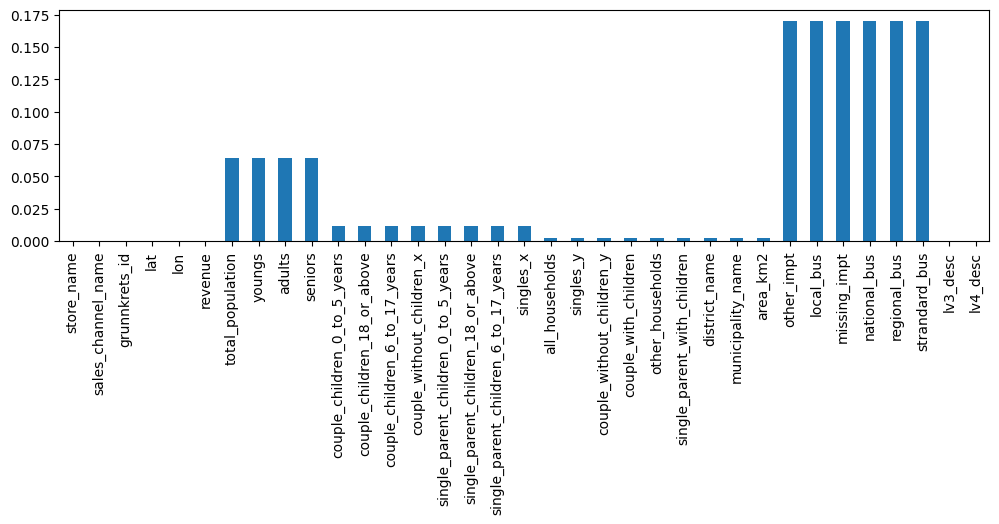

In [56]:
fig, ax1 = plt.subplots(figsize=(12, 3))
X.isna().mean().plot.bar(ax=ax1)

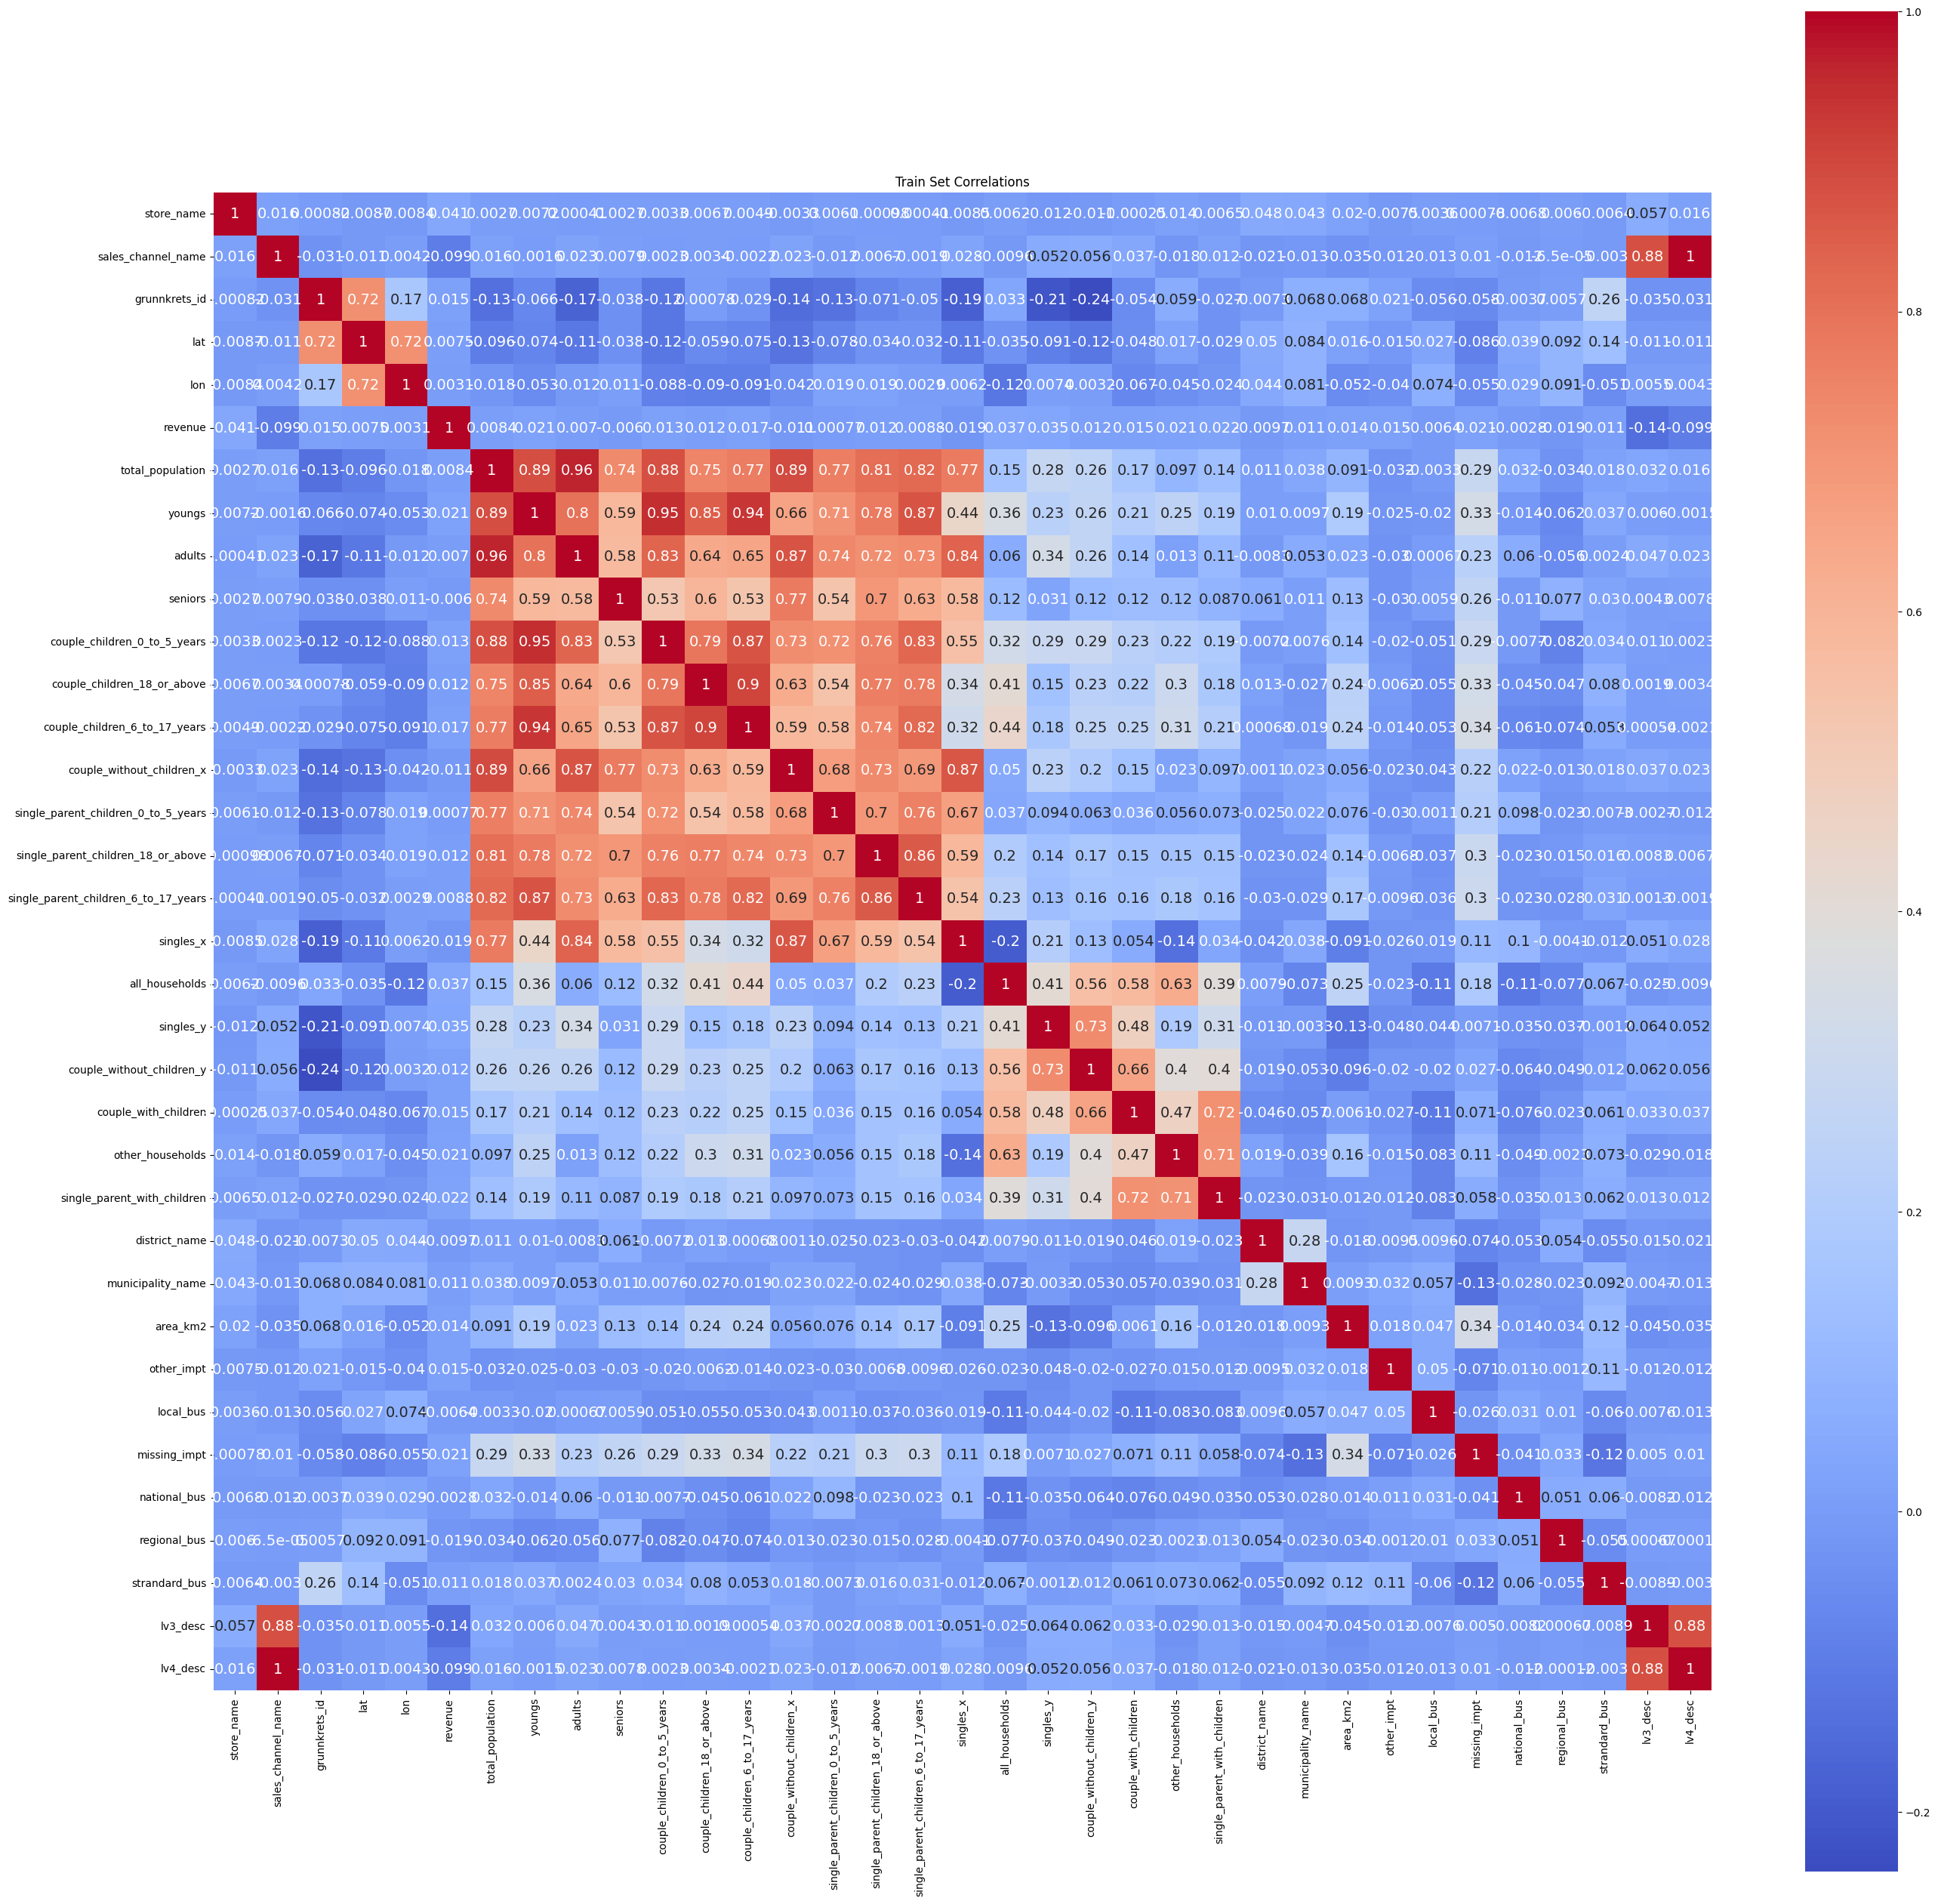

In [51]:
fig, axs = plt.subplots(figsize=(32, 32))

sns.heatmap(X.corr(), ax=axs, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
#sns.heatmap(stores_test.corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
    
axs.tick_params(axis='x', labelsize=10)
axs.tick_params(axis='y', labelsize=10)
    
axs.set_title('Train Set Correlations', size=12)
#axs[1].set_title('Test Set Correlations', size=12)

plt.show()